# EAM substrate lattice constants
probed for substrate block of crystal plane orientation [[1,-1,0],[1,1,-2],[1,1,1]] cell constant mutliples (51,30,8)  measures in xyz directions. Initial configuration created with
```python
FaceCenteredCubic('Au', directions=[[1,-1,0],[1,1,-2],[1,1,1]], size=(51,30,8), pbc=(1,1,0) )
```

In [3]:
%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import logging
from postprocessing import analyze_rdf, logger

In [5]:
# matplotlib settings

# expecially for presentation, larger font settings for plotting are recommendable
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 26

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure titlex

plt.rcParams["figure.figsize"] = (8,5) # the standard figure size

plt.rcParams["lines.linewidth"] = 4
plt.rcParams["lines.markersize"] = 14
plt.rcParams["lines.markeredgewidth"]=1 

## by RDF

In [14]:
peak_positions = {}

In [15]:
prefix = '/mnt/dat/work/testuser/substrate/AU_111_250Ang_cube/series1'

### 200 ps NPT, 250 Ang cube bulk, 100 K, 1 atm

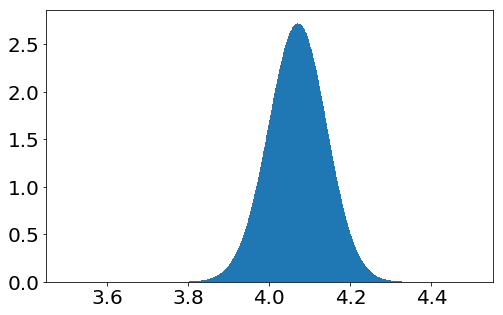

In [16]:
peak_positions["NPT 200ps bulk, 1000 frames average, 1 atm"] = analyze_rdf(
    os.path.join(prefix,'substrate_AU_111_250Ang_cube_rdf.txt'),
    format='plain',
    interval=(3.5, 4.5))

### 200 ps NPT, 250 Ang cube bulk, 100 K, 1 atm, FCC only

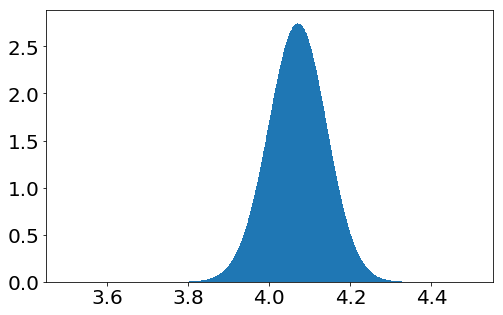

In [17]:
peak_positions[
    "NPT 200ps bulk, 1000 frames average, 1 atm, fcc only"] = analyze_rdf(
        os.path.join(prefix,'substrate_AU_111_250Ang_cube_fcc_rdf.txt'),
        format='plain',
        interval=(3.5, 4.5))

## Summary

In [18]:
header = 'mean lattice constant (Angstrom)'

In [19]:
print(
    tabulate( zip(peak_positions.keys(), peak_positions.values()),
            headers  = ('',header),
            tablefmt = 'fancy_grid'))

╒══════════════════════════════════════════════════════╤════════════════════════════════════╕
│                                                      │   mean lattice constant (Angstrom) │
╞══════════════════════════════════════════════════════╪════════════════════════════════════╡
│ NPT 200ps bulk, 1000 frames average, 1 atm           │                            4.06897 │
├──────────────────────────────────────────────────────┼────────────────────────────────────┤
│ NPT 200ps bulk, 1000 frames average, 1 atm, fcc only │                            4.06899 │
╘══════════════════════════════════════════════════════╧════════════════════════════════════╛


## by box measures:

In [20]:
cell_measures = {}

In [21]:
cell_measures['bulk_1_atm'] = np.loadtxt(
    os.path.join(prefix,'substrate_AU_111_250Ang_cube_box.txt'))

In [22]:
t = np.linspace(0,200.0,len(cell_measures['bulk_1_atm']))

### NPT 200 ps, 250 Ang bulk: box measures

Text(0, 0.5, 'd ($\\AA$)')

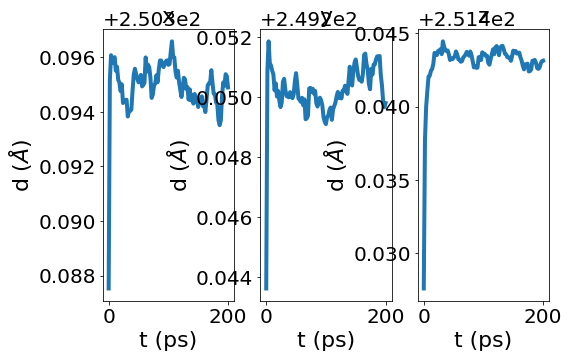

In [24]:
plt.subplot(131)
plt.plot(t, cell_measures['bulk_1_atm'][:,0], label='x' )
plt.title('x')
plt.xlabel("t (ps)")
plt.ylabel("d ($\AA$)")
plt.subplot(132)
plt.plot(t, cell_measures['bulk_1_atm'][:,1], label='y' )
plt.title('y')
plt.xlabel("t (ps)")
plt.ylabel("d ($\AA$)")
plt.subplot(133)
plt.plot(t, cell_measures['bulk_1_atm'][:,2], label='z' )
plt.title('z')
#plt.legend()
plt.xlabel("t (ps)")
plt.ylabel("d ($\AA$)")

In [25]:
# cut off initial relaxation:

In [26]:
mean_measures = {}
for k, m in cell_measures.items():
    mean_measures[k] = np.mean(m[100:,:],axis=0)

In [27]:
mean_measures

{'bulk_1_atm': array([250.39489937, 249.2498094 , 251.44313927])}

In [28]:
# crystal orientation orient = [[1,-1,0], [1,1,-2], [1,1,1]]

In [29]:
# relation between plane_spacings in this oreintation and lattice constant:
plane_spacing_to_lattice_constant = np.array(
    [np.sqrt(2), np.sqrt(6), np.sqrt(3)] )

In [30]:
plane_spacing_to_lattice_constant

array([1.41421356, 2.44948974, 1.73205081])

In [31]:
# 4.0702 is the bulk lattice constant minimized at 0 K
approximate_crystal_plane_spacing = 4.0702 / plane_spacing_to_lattice_constant

In [32]:
approximate_crystal_plane_spacing

array([2.87806602, 1.66165219, 2.34993107])

In [33]:
# expected number of crystal planes:

In [34]:
crystal_plane_count = { k: np.round(v / approximate_crystal_plane_spacing) for k,v in mean_measures.items() }

In [35]:
crystal_plane_count

{'bulk_1_atm': array([ 87., 150., 107.])}

In [36]:
exact_crystal_plane_spacing = {}
for k, m in mean_measures.items():
    exact_crystal_plane_spacing[k] = m / crystal_plane_count[k]

In [37]:
exact_crystal_plane_spacing

{'bulk_1_atm': array([2.87810229, 1.6616654 , 2.34993588])}

In [38]:
# deviation from ideal crystal plane spacing 
for k, v in exact_crystal_plane_spacing.items():
    print(k,':',100.0*( v - approximate_crystal_plane_spacing) / approximate_crystal_plane_spacing)

bulk_1_atm : [0.00126025 0.00079464 0.00020491]


In [39]:
# deviation from ideal crystal plane spacing 
anisotropic_lattice_spacing = {}
for k, v in exact_crystal_plane_spacing.items():
    anisotropic_lattice_spacing[k] = v*plane_spacing_to_lattice_constant

In [40]:
anisotropic_lattice_spacing

{'bulk_1_atm': array([4.07025129, 4.07023234, 4.07020834])}

In [41]:
print(
    tabulate( [ [k, *v] for k,v in anisotropic_lattice_spacing.items() ],
    headers  = ('mean anisotropic lattice constants','x','y','z'),
    tablefmt = 'fancy_grid'))

╒══════════════════════════════════════╤═════════╤═════════╤═════════╕
│ mean anisotropic lattice constants   │       x │       y │       z │
╞══════════════════════════════════════╪═════════╪═════════╪═════════╡
│ bulk_1_atm                           │ 4.07025 │ 4.07023 │ 4.07021 │
╘══════════════════════════════════════╧═════════╧═════════╧═════════╛



## Cube measures

In [73]:
number_of_atoms_in_slab = 73440

In [85]:
# reconstructing number of atoms from unit cell count
np.prod(crystal_plane_count / [1,3,3])*6

73440.0

In [87]:
anisotropic_lattice_spacing

{'bulk_0_atm': array([4.07491409, 4.07487076, 4.07505526]),
 'bulk_1_atm': array([4.07491335, 4.07487001, 4.07505452]),
 'slab_0_atm': array([4.05660998, 4.05708041, 4.07011039]),
 'slab_1_atm': array([4.05660619, 4.05707661, 4.07011039])}

In [94]:
crystal_plane_count

array([51., 90., 24.])

In [95]:
mean_measures

{'bulk_0_atm': array([146.95136872, 149.72031187,  56.46562207]),
 'bulk_1_atm': array([146.95134191, 149.72028456,  56.46561176]),
 'slab_0_atm': array([146.29127787, 149.06665272,  56.39710389]),
 'slab_1_atm': array([146.29114111, 149.06651301,  56.39710389])}

In [96]:
mean_base_length = (mean_measures['bulk_1_atm'][0] + mean_measures['bulk_1_atm'][1])/2.0

In [97]:
mean_base_length

148.33581323446694

In [98]:
scale_factor = mean_base_length / mean_measures['bulk_1_atm'][2]

In [99]:
scale_factor

2.6270115316404463

In [116]:
scale_factor * crystal_plane_count[2]

63.04827675937071

In [113]:
cube_crystal_plane_count = np.round(
    crystal_plane_count * [1,1,scale_factor] )

In [115]:
cube_crystal_plane_count

array([51., 90., 63.])

In [117]:
# reconstructing number of atoms in cube from unit cell count
np.prod(cube_crystal_plane_count / [1,3,3])*6

192780.0